In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Define dataset path (modify with your actual Drive folder path)
dataset_path = "/content/drive/MyDrive/DAUP/Chess"

# List categories (subfolders)
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Count images per category
category_counts = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in categories}

# Display category counts
category_counts


{'Knight': 106,
 'Bishop': 87,
 'King': 76,
 'Rook': 102,
 'Pawn': 107,
 'Queen': 78}

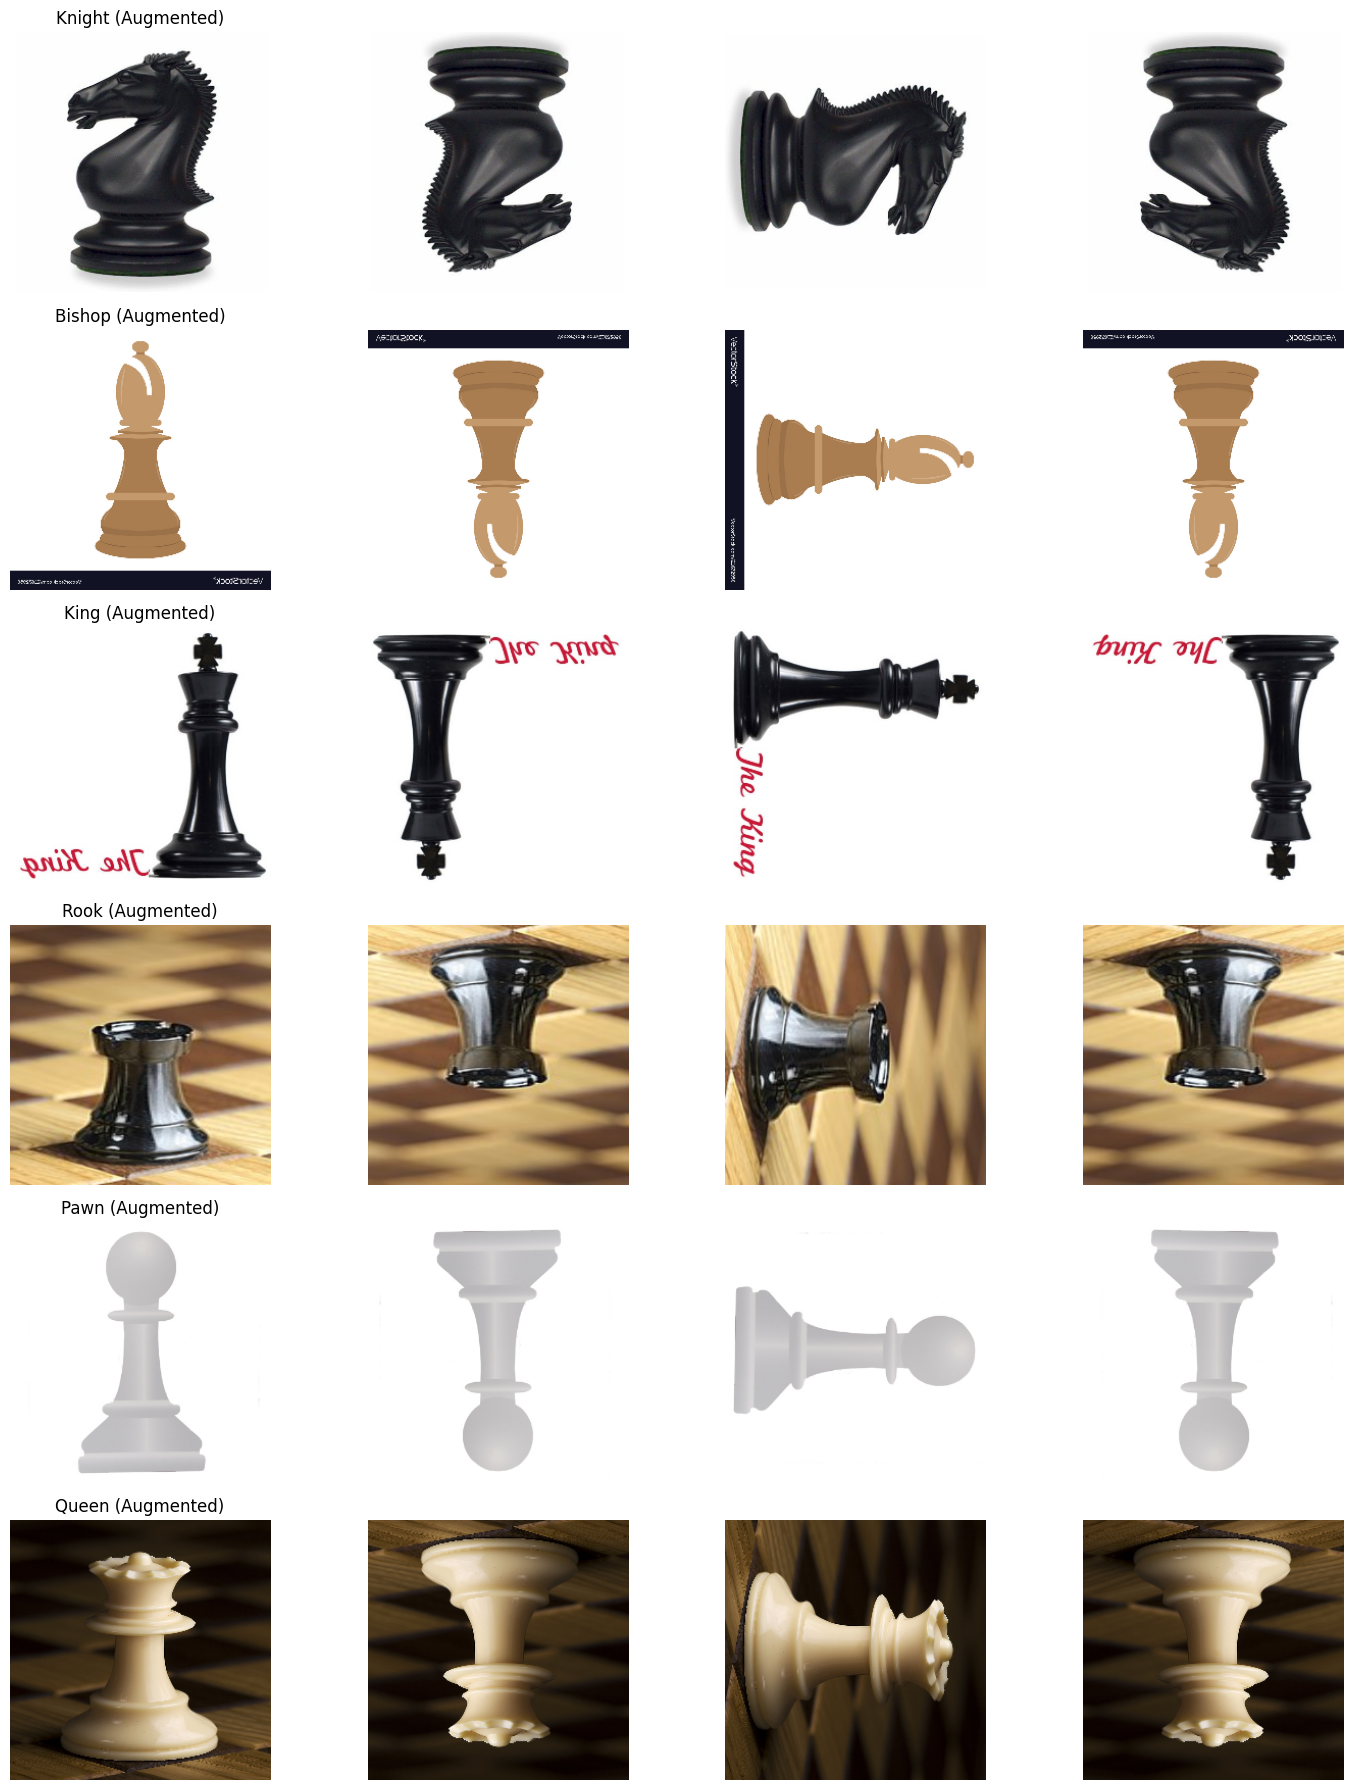

In [ ]:
# --- Image Augmentation ---
import os
import cv2 # Import the OpenCV library
import numpy as np
import matplotlib.pyplot as plt

def augment_image(image):
    augmented_images = []
    augmented_images.append(cv2.flip(image, 1))  # Horizontal Flip
    augmented_images.append(cv2.flip(image, 0))  # Vertical Flip
    for angle in [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE]:
        augmented_images.append(cv2.rotate(image, angle))
    for factor in [0.7, 1.3]:  # Adjusted brightness factors
        bright_image = np.clip(image * factor, 0, 255).astype(np.uint8)
        augmented_images.append(bright_image)
    # Add more augmentation techniques if needed (e.g., random cropping, rotation)
    return augmented_images

# Apply augmentation and store images
augmented_images = {category: [] for category in categories}
for category in categories:
    category_path = os.path.join(dataset_path, category)
    images = os.listdir(category_path)
    for img_name in images:
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_rgb_resized = cv2.resize(img_rgb, (256, 256))
            augmented_images[category].extend(augment_image(img_rgb_resized))

# Display a sample of augmented images
# Display augmented images from multiple categories
fig, axes = plt.subplots(len(categories), 4, figsize=(15, 3 * len(categories)))

for i, category in enumerate(categories):
    sample_images = augmented_images[category][:4]  # Take first 4 augmented images

    for j, img in enumerate(sample_images):
        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        if j == 0:
            axes[i, j].set_title(f"{category} (Augmented)")

plt.tight_layout()
plt.show()


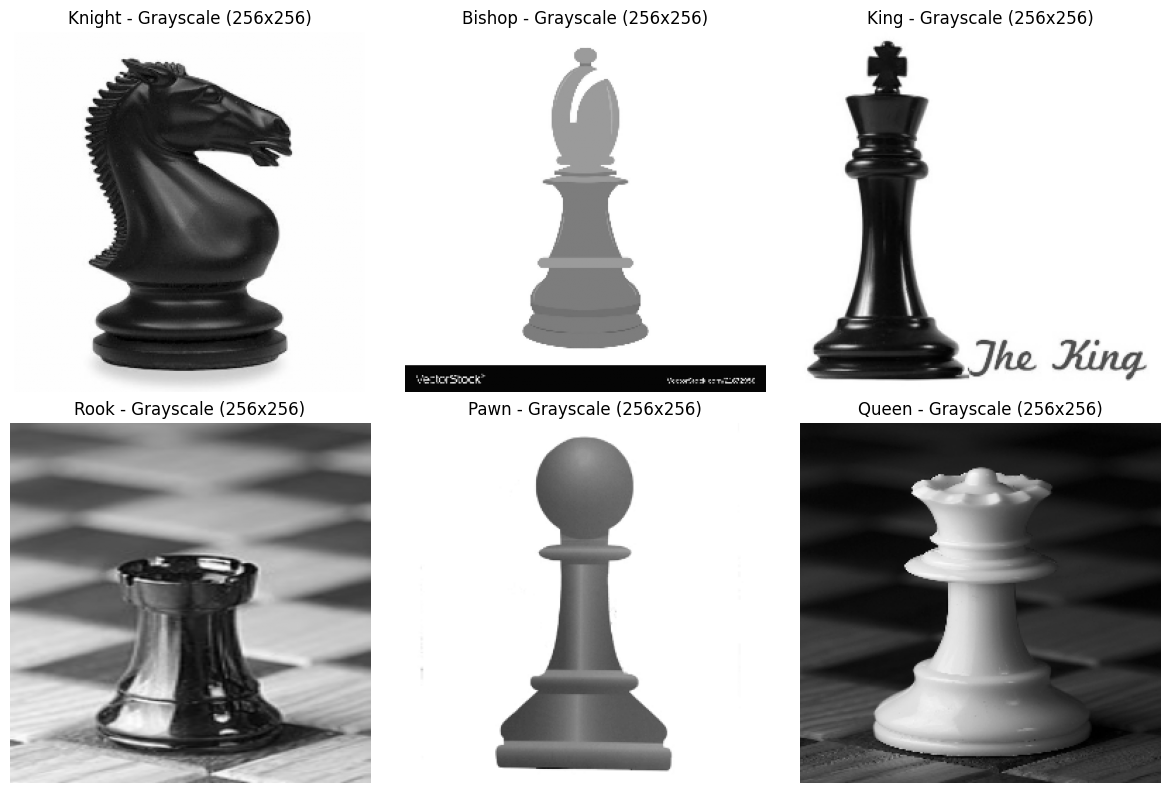

In [ ]:
import cv2
import numpy as np

# Initialize dictionaries to store processed images
processed_images_gray = {}
processed_images_rgb_256 = {}
processed_images_rgb_200 = {}

# Process each category
for category in categories:
    category_path = os.path.join(dataset_path, category)
    images = os.listdir(category_path)

    processed_images_gray[category] = []
    processed_images_rgb_256[category] = []
    processed_images_rgb_200[category] = []

    for img_name in images:
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)  # Read image (BGR format)

        if img is None:
            continue  # Skip if the image is unreadable

        # Convert to grayscale (256x256)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_gray_resized = cv2.resize(img_gray, (256, 256)) / 255.0  # Normalize
        processed_images_gray[category].append(img_gray_resized)

        # Convert to RGB (256x256 and 200x200)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_rgb_resized_256 = cv2.resize(img_rgb, (256, 256)) / 255.0
        img_rgb_resized_200 = cv2.resize(img_rgb, (200, 200)) / 255.0

        processed_images_rgb_256[category].append(img_rgb_resized_256)
        processed_images_rgb_200[category].append(img_rgb_resized_200)

# Display sample images from multiple categories
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for ax, category in zip(axes.flat, categories):
    ax.imshow(processed_images_gray[category][0], cmap="gray")
    ax.set_title(f"{category} - Grayscale (256x256)")
    ax.axis("off")

plt.tight_layout()
plt.show()


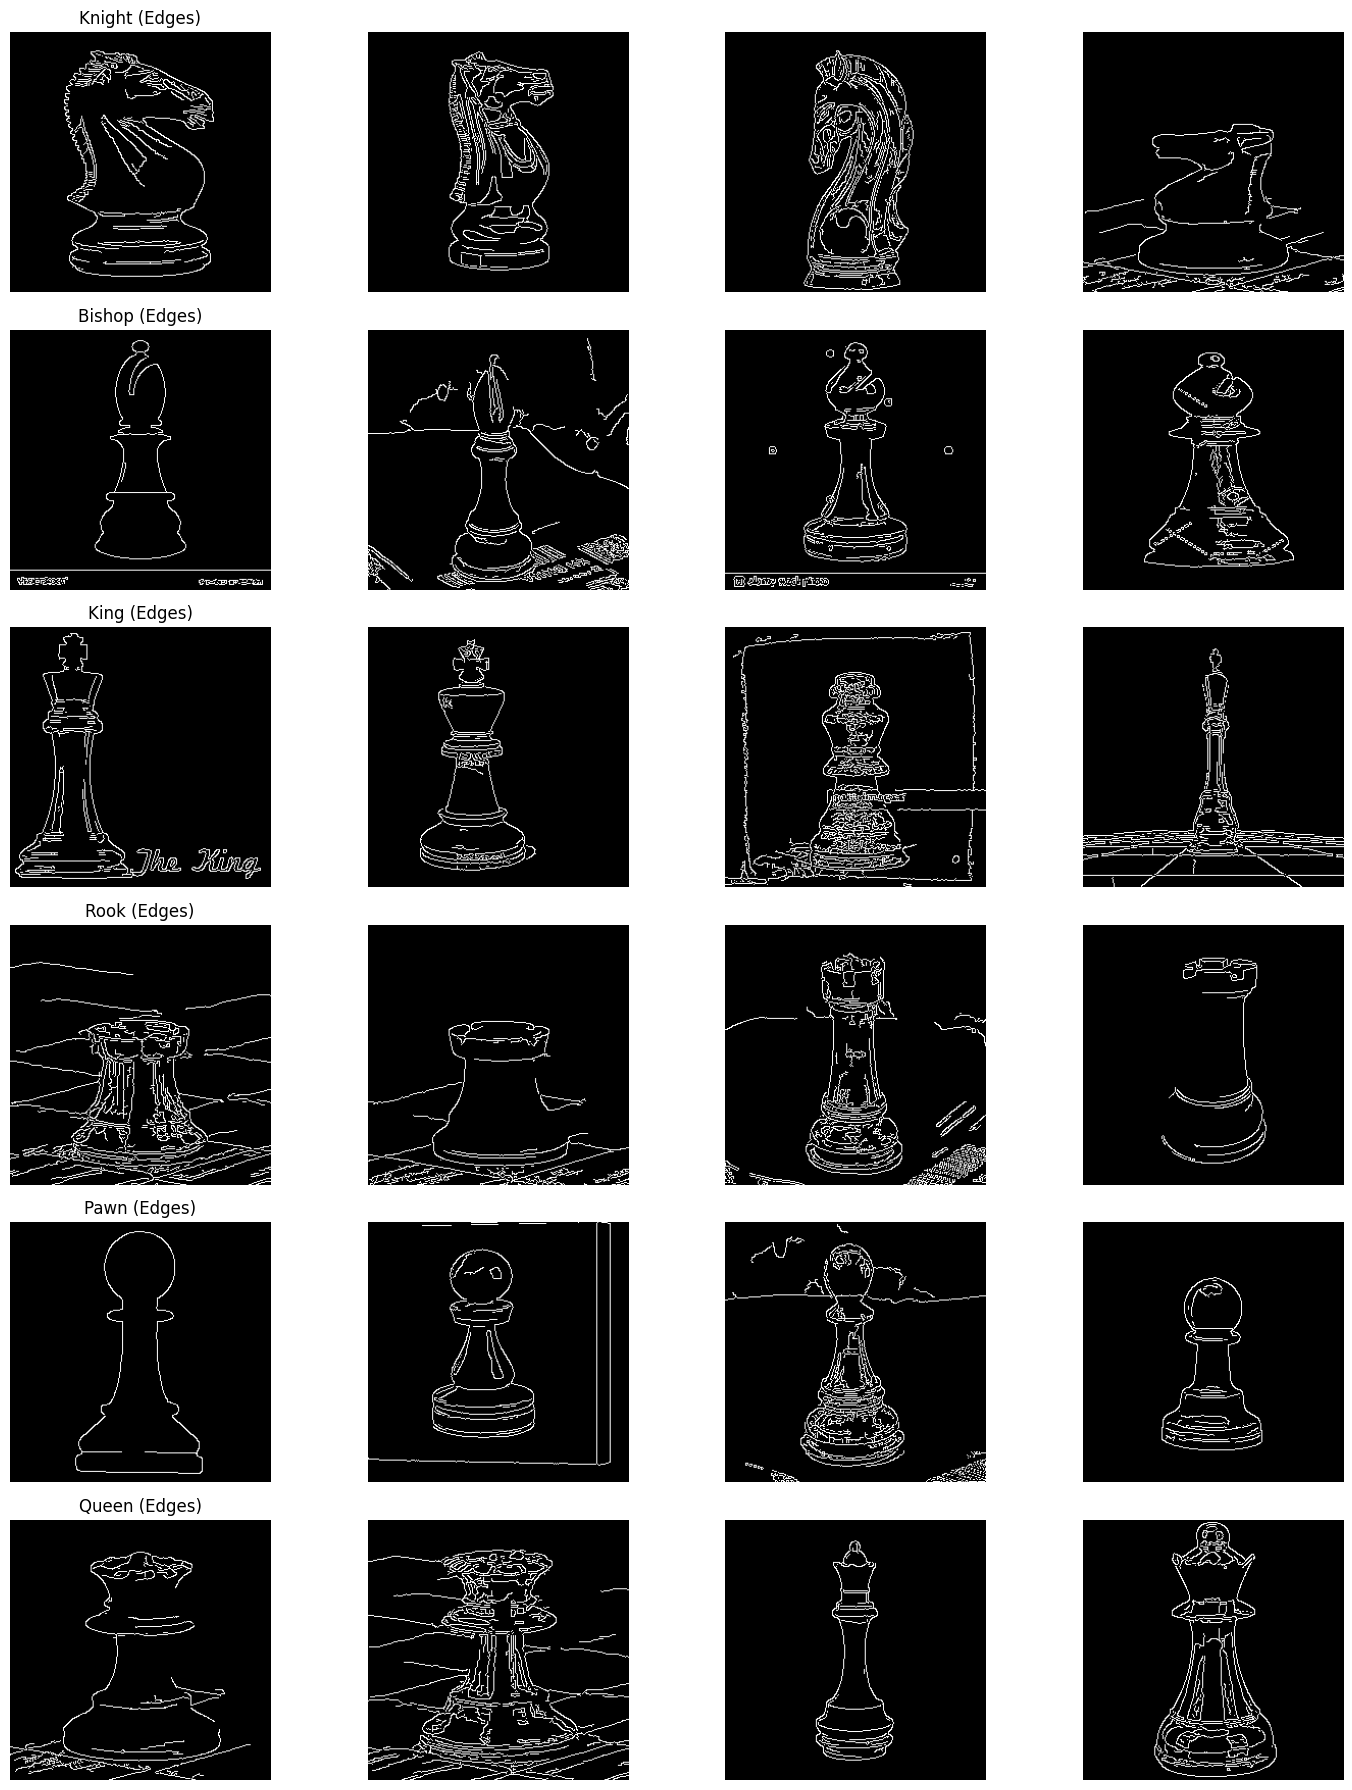

In [ ]:
# Apply Canny Edge Detection to all images
edges_images = {category: [] for category in categories}

for category in categories:
    for img in processed_images_gray[category]:  # Use grayscale images
        edges = cv2.Canny((img * 255).astype(np.uint8), 50, 150)  # Canny Edge Detection
        edges_images[category].append(edges)

# Display edge-detected images from multiple categories
fig, axes = plt.subplots(len(categories), 4, figsize=(15, 3 * len(categories)))

for i, category in enumerate(categories):
    sample_edges = edges_images[category][:4]  # Take first 4 edge images

    for j, edge_img in enumerate(sample_edges):
        axes[i, j].imshow(edge_img, cmap="gray")
        axes[i, j].axis("off")
        if j == 0:
            axes[i, j].set_title(f"{category} (Edges)")

plt.tight_layout()
plt.show()


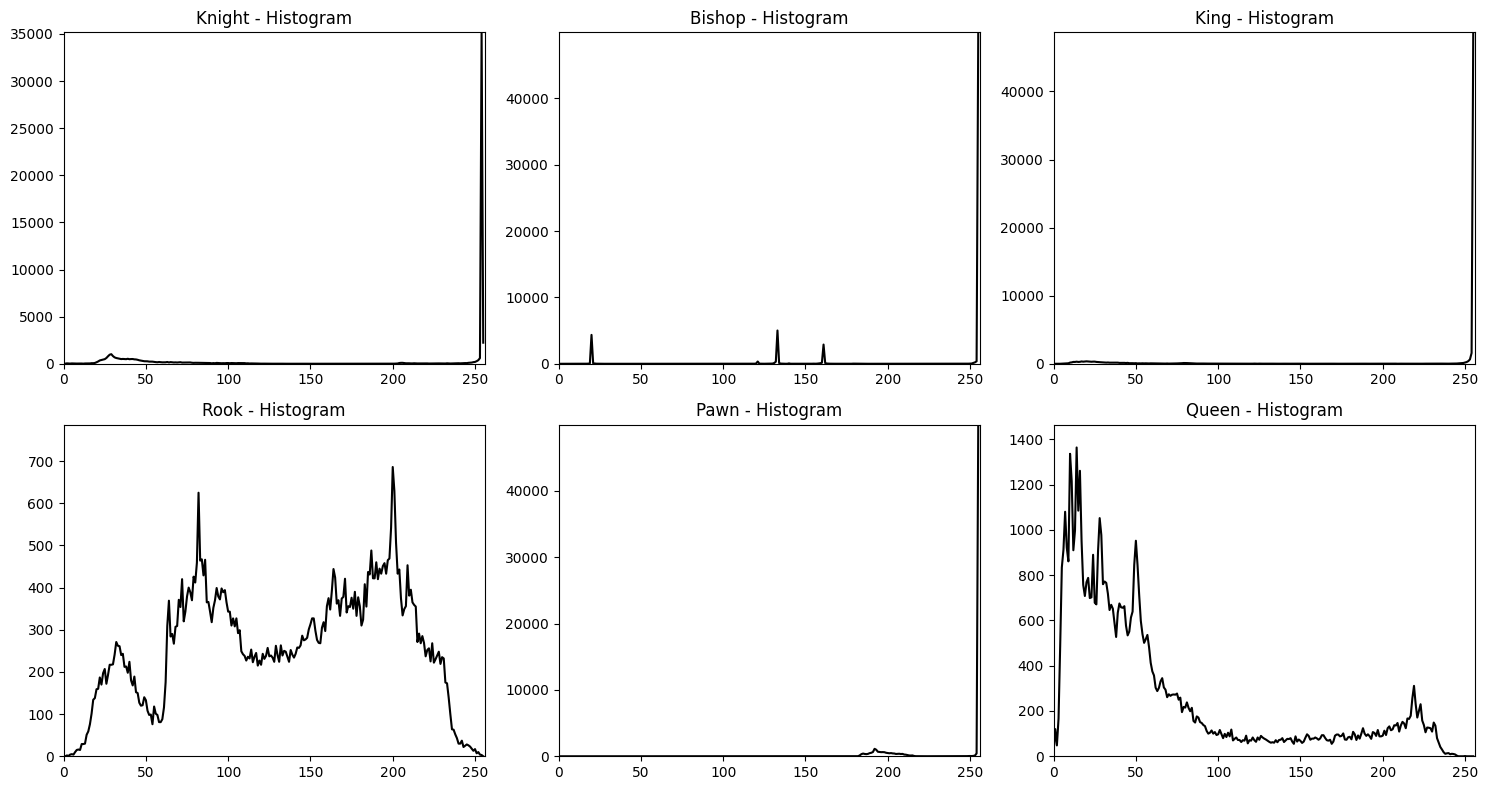

In [ ]:
# Plot histogram for each category with proper scaling
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for ax, category in zip(axes.flat, categories):
    img = (processed_images_gray[category][0] * 255).astype(np.uint8)  # Convert back to 0-255 uint8
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])  # Compute histogram

    ax.plot(hist, color="black")
    ax.set_title(f"{category} - Histogram")
    ax.set_xlim([0, 256])
    ax.set_ylim([0, hist.max() + 100])  # Adjust y-limit for better visualization

plt.tight_layout()
plt.show()


In [ ]:
import os
import cv2
import numpy as np

# Define output folder
output_folder = "Preprocessed_Chessman_Dataset"
os.makedirs(output_folder, exist_ok=True)

# Save images
for category in categories:
    category_path = os.path.join(output_folder, category)
    os.makedirs(category_path, exist_ok=True)

    for idx, img in enumerate(augmented_images[category]):
        file_path = os.path.join(category_path, f"{category}_{idx}.png")
        cv2.imwrite(file_path, (img * 255).astype(np.uint8))  # Convert back to uint8 for saving

print("✅ Preprocessed and Augmented images saved successfully!")


✅ Preprocessed and Augmented images saved successfully!


In [ ]:
import pickle

# Save processed images as a dictionary
with open("Preprocessed_Chessman_Dataset.pkl", "wb") as f:
    pickle.dump(augmented_images, f)

print("✅ Pickle file saved successfully!")


✅ Pickle file saved successfully!


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define dataset path
dataset_path = "Preprocessed_Chessman_Dataset"
# --- Model Building and Training ---

# Image Data Generator
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    # Add more augmentation here if desired (e.g., shear_range, zoom_range)
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)
# Class Labels
print("Class Labels:", train_generator.class_indices)


Found 3111 images belonging to 6 classes.
Found 774 images belonging to 6 classes.
Class Labels: {'Bishop': 0, 'King': 1, 'Knight': 2, 'Pawn': 3, 'Queen': 4, 'Rook': 5}


In [ ]:
# Define CNN Model (consider adding more layers or complexity)
from tensorflow.keras.models import Sequential  # Import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Import other necessary layers

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15  # Consider increasing epochs
)

model.save("chessman_cnn_model_improved.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,750 (56.61 MB)

 Trainable params: 14,839,750 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.1980 - loss: 2.1159 - val_accuracy: 0.2933 - val_loss: 1.7063
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.3573 - loss: 1.5772 - val_accuracy: 0.4031 - val_loss: 1.5113
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.5851 - loss: 1.1385 - val_accuracy: 0.4121 - val_loss: 1.4985
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.6877 - loss: 0.8633 - val_accuracy: 0.4638 - val_loss: 1.6347
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.7777 - loss: 0.6204 - val_accuracy: 0.4884 - val_loss: 1.6593
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.8430 - loss: 0.4884 - val_accuracy: 0.5090 - val_loss: 1.8648
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.8853 - loss: 0.3720 - val_accuracy: 0.4819 - val_loss: 2.2048
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.9121 - loss: 0.2763 - val_accuracy: 0.476

In [ ]:
# Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Save Model
model.save("chessman_cnn_model.h5")
print("✅ Model Training Completed & Saved!")


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - accuracy: 0.9651 - loss: 0.1233 - val_accuracy: 0.4845 - val_loss: 2.6749
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.9725 - loss: 0.0874 - val_accuracy: 0.4780 - val_loss: 3.1886
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.9727 - loss: 0.0789 - val_accuracy: 0.4935 - val_loss: 3.2401
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.9724 - loss: 0.0866 - val_accuracy: 0.5052 - val_loss: 2.6904
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.9731 - loss: 0.0874 - val_accuracy: 0.4910 - val_loss: 2.9304
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9805 - loss: 0.0753 - val_accuracy: 0.4819 - val_loss: 3.0184
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 0.9715 - loss: 0.1096 - val_accuracy: 0.4922 - val_loss: 2.8804
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.9787 - loss: 0.0750 - val_accu

✅ Model Training Completed & Saved!


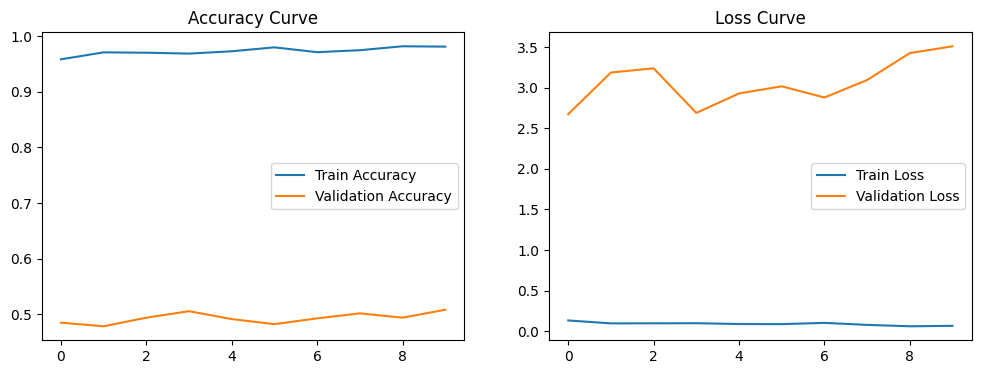

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy & Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Loss Curve")
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
Predicted Chessman: King


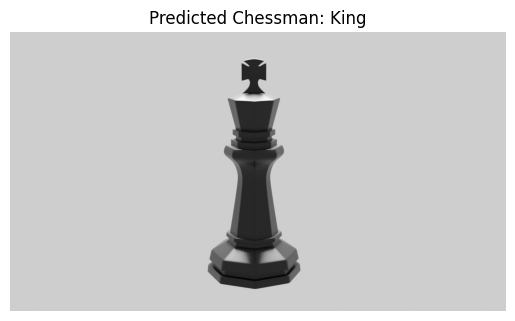

In [ ]:
# --- Prediction Function ---

def predict_chessman(image_path, model):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_labels = train_generator.class_indices  # Get labels from generator
    class_labels = {v: k for k, v in class_labels.items()}  # Invert dictionary
    predicted_label = class_labels.get(predicted_class, "Unknown")
    return predicted_label

# --- Example Usage ---

# Load the trained model
loaded_model = load_model("chessman_cnn_model_improved.h5")

image_path = "/content/king.jpg"
predicted_chessman = predict_chessman(image_path, loaded_model)
print("Predicted Chessman:", predicted_chessman)

# Display the image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(f"Predicted Chessman: {predicted_chessman}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Predicted Chessman: Queen


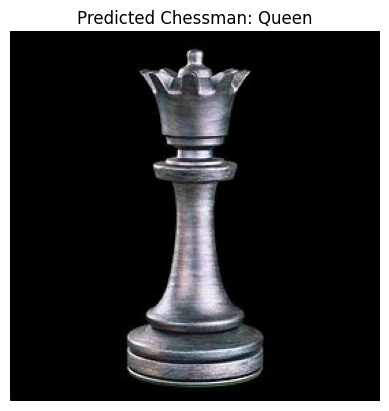

In [ ]:
# --- Prediction Function ---

def predict_chessman(image_path, model):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_labels = train_generator.class_indices  # Get labels from generator
    class_labels = {v: k for k, v in class_labels.items()}  # Invert dictionary
    predicted_label = class_labels.get(predicted_class, "Unknown")
    return predicted_label

# --- Example Usage ---

# Load the trained model
loaded_model = load_model("chessman_cnn_model_improved.h5")

image_path = "/content/queen.jpg"
predicted_chessman = predict_chessman(image_path, loaded_model)
print("Predicted Chessman:", predicted_chessman)

# Display the image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(f"Predicted Chessman: {predicted_chessman}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
Predicted Chessman: Knight


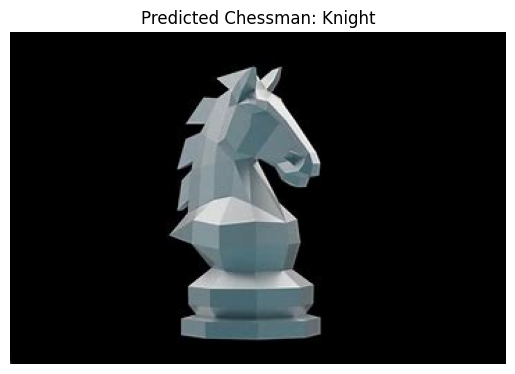

In [ ]:
# --- Prediction Function ---

def predict_chessman(image_path, model):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_labels = train_generator.class_indices  # Get labels from generator
    class_labels = {v: k for k, v in class_labels.items()}  # Invert dictionary
    predicted_label = class_labels.get(predicted_class, "Unknown")
    return predicted_label

# --- Example Usage ---

# Load the trained model
loaded_model = load_model("chessman_cnn_model_improved.h5")

image_path = "/content/horse.jpg"
predicted_chessman = predict_chessman(image_path, loaded_model)
print("Predicted Chessman:", predicted_chessman)

# Display the image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title(f"Predicted Chessman: {predicted_chessman}")
plt.axis('off')
plt.show()


In [ ]:
# prompt: p-test z-test t-test anova test chi square test

import pandas as pd
from scipy import stats

# Sample data (replace with your actual data)
# Example data for demonstration
data = {
    'GroupA': [10, 12, 15, 11, 13],
    'GroupB': [18, 20, 19, 17, 21],
    'GroupC': [14, 16, 13, 15, 17]
}

df = pd.DataFrame(data)

# --- P-test (one sample)
# Test if the mean of GroupA is significantly different from 12 (population mean)

t_statistic, p_value = stats.ttest_1samp(df['GroupA'], 12)

print("One-Sample t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# --- Z-test (two sample)
# Test if the means of GroupA and GroupB are significantly different

# Calculate z-score and p-value
z_statistic, p_value = stats.ttest_ind(df['GroupA'], df['GroupB'])

print("\nTwo-Sample t-test:")
print("z-statistic:", z_statistic)
print("p-value:", p_value)

# --- t-test (two sample)
# Perform t-test using scipy.stats.ttest_ind
t_statistic, p_value = stats.ttest_ind(df['GroupA'], df['GroupC'])
print("\nTwo-Sample t-test (independent samples):")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# --- ANOVA test
# Test for differences between means of multiple groups

f_statistic, p_value = stats.f_oneway(df['GroupA'], df['GroupB'], df['GroupC'])
print("\nANOVA test:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)


# --- Chi-square test
# Example data: observed frequencies in a contingency table (replace with your actual data)
observed = [[10, 20, 15], [15, 25, 20]]
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print("\nChi-square test:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)



One-Sample t-test:
t-statistic: 0.23249527748763774
p-value: 0.8275647196020324

Two-Sample t-test:
z-statistic: -6.1065802689103466
p-value: 0.00028738040904684056

Two-Sample t-test (independent samples):
T-statistic: -2.514474228374849
P-value: 0.0361183129071552

ANOVA test:
F-statistic: 20.137931034482758
p-value: 0.0001463121041002853

Chi-square test:
Chi-square statistic: 0.1296296296296296
p-value: 0.9372410104578182
Degrees of freedom: 2
Expected frequencies: [[10.71428571 19.28571429 15.        ]
 [14.28571429 25.71428571 20.        ]]


In [ ]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# --- Data Preprocessing ---

# Mount Google Drive (if using Google Colab)
# from google.colab import drive
# drive.mount('/content/drive')

# Define dataset path
dataset_path = "/content/drive/MyDrive/DAUP/Chess"  # Update with your dataset path

# List categories (subfolders)
categories = [folder for folder in os.listdir(dataset_path)
              if os.path.isdir(os.path.join(dataset_path, folder))]

# --- Image Augmentation ---

def augment_image(image):
    augmented_images = []
    augmented_images.append(cv2.flip(image, 1))  # Horizontal Flip
    augmented_images.append(cv2.flip(image, 0))  # Vertical Flip
    for angle in [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE]:
        augmented_images.append(cv2.rotate(image, angle))
    for factor in [0.7, 1.3]:  # Adjusted brightness factors
        bright_image = np.clip(image * factor, 0, 255).astype(np.uint8)
        augmented_images.append(bright_image)
    # Add more augmentation techniques if needed (e.g., random cropping, rotation)
    return augmented_images

# Apply augmentation and store images
augmented_images = {category: [] for category in categories}
for category in categories:
    category_path = os.path.join(dataset_path, category)
    images = os.listdir(category_path)
    for img_name in images:
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_rgb_resized = cv2.resize(img_rgb, (256, 256))
            augmented_images[category].extend(augment_image(img_rgb_resized))

# --- Model Building and Training ---

# Image Data Generator
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    # Add more augmentation here if desired (e.g., shear_range, zoom_range)
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Define CNN Model (consider adding more layers or complexity)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15  # Consider increasing epochs
)

model.save("chessman_cnn_model_improved.h5")

# --- Prediction Function ---

def predict_chessman(image_path, model):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_labels = train_generator.class_indices  # Get labels from generator
    class_labels = {v: k for k, v in class_labels.items()}  # Invert dictionary
    predicted_label = class_labels.get(predicted_class, "Unknown")
    return predicted_label

# --- Example Usage ---

# Load the trained model
loaded_model = load_model("chessman_cnn_model_improved.h5")

image_path = "/content/download.jpg"
predicted_chessman = predict_chessman(image_path, loaded_model)
print("Predicted Chessman:", predicted_chessman)
print(image_path)

Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,750 (56.61 MB)

 Trainable params: 14,839,750 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 715ms/step - accuracy: 0.1570 - loss: 2.5256 - val_accuracy: 0.2202 - val_loss: 1.7864
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 425ms/step - accuracy: 0.2641 - loss: 1.7728 - val_accuracy: 0.2018 - val_loss: 1.7545
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 448ms/step - accuracy: 0.3315 - loss: 1.6354 - val_accuracy: 0.2844 - val_loss: 1.7173
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 441ms/step - accuracy: 0.4781 - loss: 1.4591 - val_accuracy: 0.3211 - val_loss: 1.7104
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - accuracy: 0.5112 - loss: 1.2771 - val_accuracy: 0.3945 - val_loss: 1.6541
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 487ms/step - accuracy: 0.5946 - loss: 1.0259 - val_accuracy: 0.3578 - val_loss: 1.8296
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 425ms/step - accuracy: 0.7172 - loss: 0.7747 - val_accuracy: 0.4220 - val_loss: 1.8008
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 482ms/step - accuracy: 0.8263 - loss: 0.5469 - val_accuracy:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Predicted Chessman: Knight
/content/download.jpg
